Quelle: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

Erklärung zu den Spalten: https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz/edit?gid=1967362979#gid=1967362979

In [110]:
import pandas as pd


df = pd.read_csv("../data/raw/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN


In [111]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [112]:
df.isna().sum().sort_values(ascending=False)

calendar_updated         37541
license                  32200
neighborhood_overview    16650
neighbourhood            16649
host_about               16247
                         ...  
longitude                    0
amenities                    0
property_type                0
listing_url                  0
id                           0
Length: 75, dtype: int64

## Frage: 
1. Was kostet eine Airbnb in NY durchschnittlich?
2. Wie können wir Duplikate erkennen und entfernen

In [113]:
# process column values
df["price"] = df["price"].str.replace(
    '$', '').str.replace(',', '').astype(float)
df["price"].mean()

np.float64(232.8917946467749)

In [114]:
# Der Datensatz hat einige exakte Duplikate
print(df.shape)
print(df.drop_duplicates().shape)

(37541, 75)
(37541, 75)


In [116]:
# Variante 1
# entferne werte außerhalb des 99 percentils 
df = df[(df["price"] < df["price"].quantile(0.99)) | (df["price"].isna())]

# Variante 2


In [117]:
df.shape

(37311, 75)

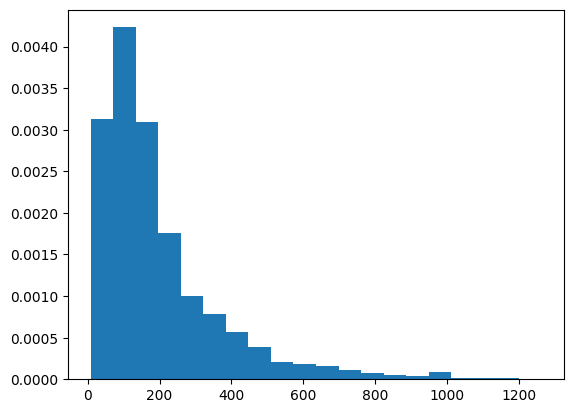

In [118]:
import matplotlib.pyplot as plt

plt.hist(df["price"], bins=20, density=True)
plt.show()

<Axes: ylabel='price'>

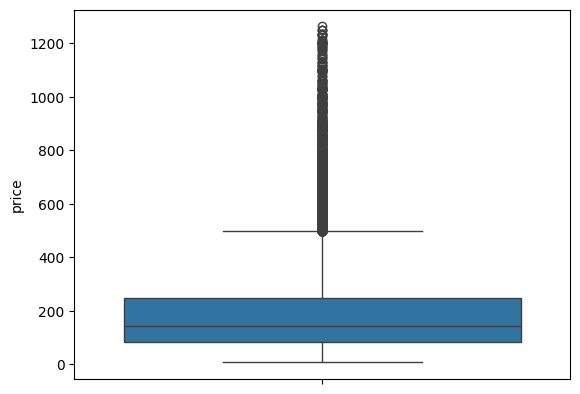

In [119]:
sns.boxplot(df["price"])

In [ ]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

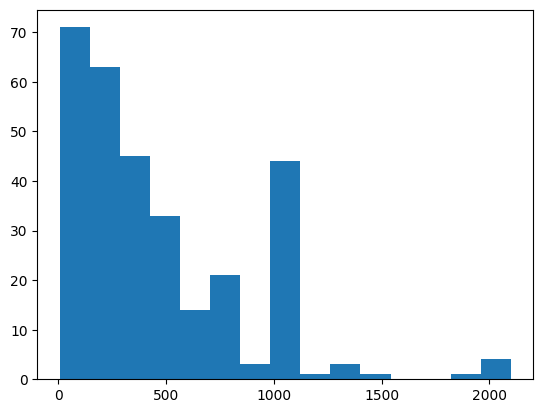

In [ ]:
plt.hist(df[(df["room_type"] == "Hotel room") & (df["minimum_nights"] == 1)]["price"], bins=15)
plt.show()

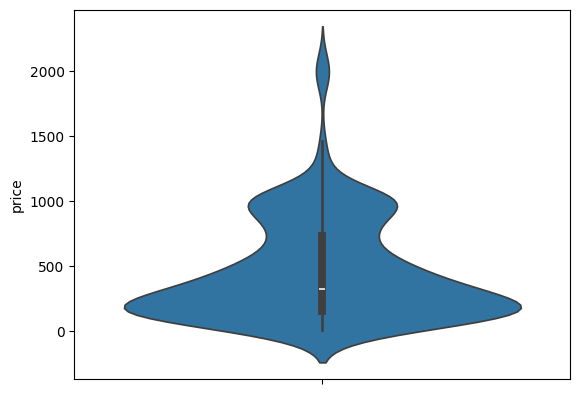

In [ ]:
import seaborn as sns

sns.violinplot(df[(df["room_type"] == "Hotel room") &
               (df["minimum_nights"] == 1)]["price"])
plt.show()

## Wie verhalten sich die Preise in Abhängigkeit zu 
- Stadtteil
- Room Type
- minimum_nights 


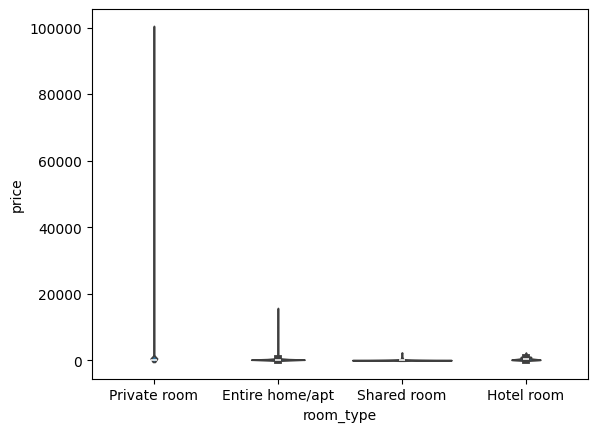

In [ ]:
import seaborn as sns

sns.violinplot(x="room_type", y="price", data=df)
plt.show()

<Axes: xlabel='room_type', ylabel='price'>

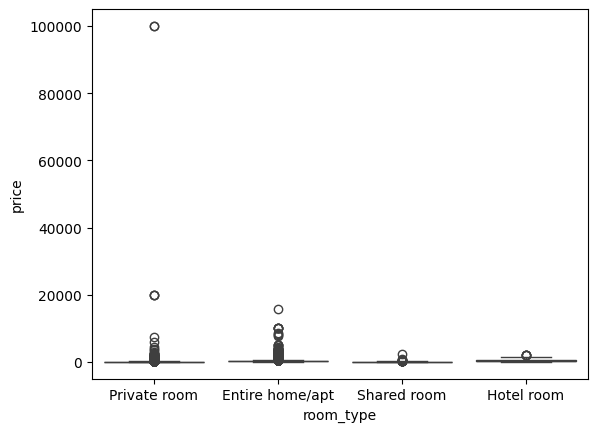

In [ ]:
sns.boxplot(x="room_type", y="price", data=df)

In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<Axes: >

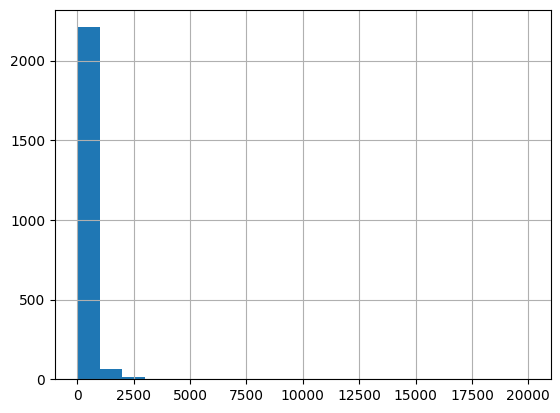

In [ ]:
df[df["minimum_nights"] == 1]["price"].hist(bins=20)

In [ ]:
df["neighbourhood_group_cleansed"].value_counts()

neighbourhood_group_cleansed
Manhattan        16545
Brooklyn         13863
Queens            5551
Bronx             1217
Staten Island      365
Name: count, dtype: int64

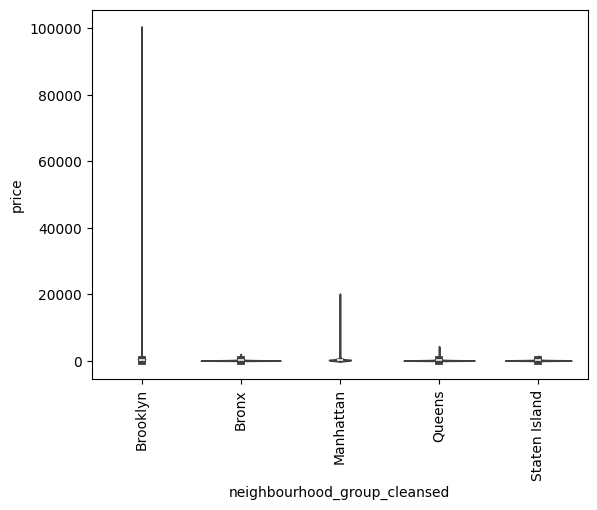

In [ ]:
sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=df)
plt.xticks(rotation=90)
plt.show()

### Preis und Anzahl Nächte

In [ ]:
df["minimum_nights"].describe()

count    37541.00000
mean        28.98162
std         30.70918
min          1.00000
25%         30.00000
50%         30.00000
75%         30.00000
max       1250.00000
Name: minimum_nights, dtype: float64

In [ ]:
import numpy as np


def get_interval(df, num_bins=5):
    min_nights = df["minimum_nights"].min()
    max_nights = df["minimum_nights"].max()
    interval = round((max_nights - min_nights) / num_bins)
    return interval

def get_bins_from_interval(df, interval):
    min_nights = df["minimum_nights"].min()
    max_nights = df["minimum_nights"].max()
    bins = np.arange(min_nights, max_nights + interval, interval)
    return bins

In [ ]:
night_categories = pd.cut(
    df["minimum_nights"], bins=get_bins_from_interval(df, get_interval(df)), include_lowest=True)
night_categories.value_counts()

minimum_nights
(0.999, 251.0]      37412
(251.0, 501.0]        112
(501.0, 751.0]          8
(1001.0, 1251.0]        6
(751.0, 1001.0]         3
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, '(0.999, 251.0]'),
  Text(1, 0, '(251.0, 501.0]'),
  Text(2, 0, '(501.0, 751.0]'),
  Text(3, 0, '(751.0, 1001.0]'),
  Text(4, 0, '(1001.0, 1251.0]')])

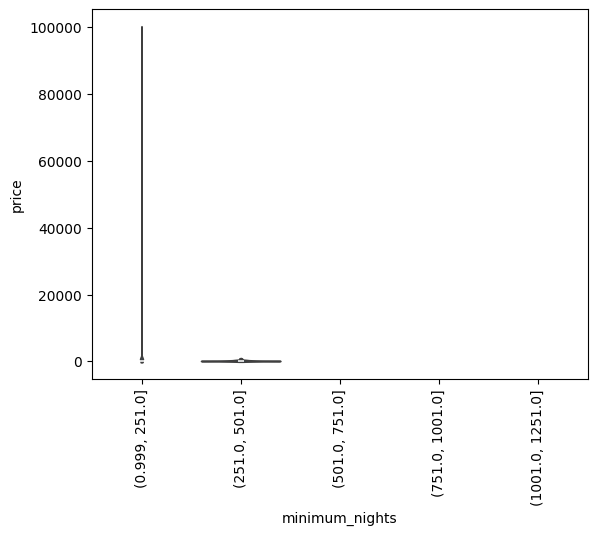

In [ ]:
sns.violinplot(x=night_categories, y=df["price"])
plt.xticks(rotation=90)

In [ ]:
# remove outliers from min nights by using 95% quantile
q = df["minimum_nights"].quantile(0.95)
df = df[df["minimum_nights"] < q]
df = df[df["minimum_nights"] > 0]

In [ ]:
night_categories = pd.cut(
    df["minimum_nights"], bins=get_bins_from_interval(df, get_interval(df, num_bins=10)), include_lowest=True)
night_categories.value_counts()

minimum_nights
(28.0, 31.0]    30139
(0.999, 4.0]     4798
(4.0, 7.0]        321
(13.0, 16.0]       54
(7.0, 10.0]        14
(25.0, 28.0]        4
(19.0, 22.0]        3
(16.0, 19.0]        2
(10.0, 13.0]        1
(22.0, 25.0]        1
Name: count, dtype: int64

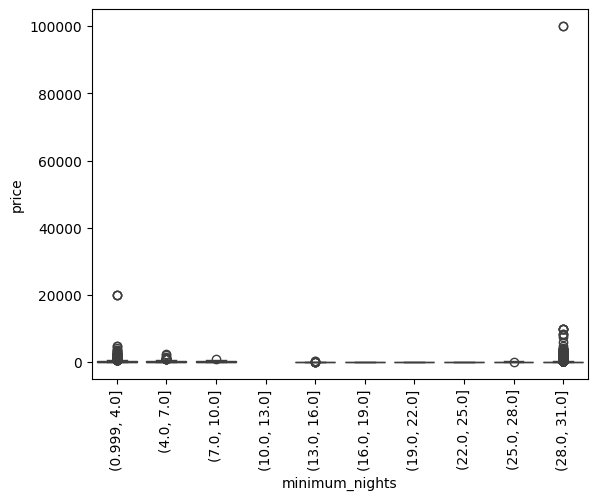

In [ ]:
sns.boxplot(x=night_categories, y=df["price"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
price_nights_notna = df.dropna(
    subset=["price", "minimum_nights"])

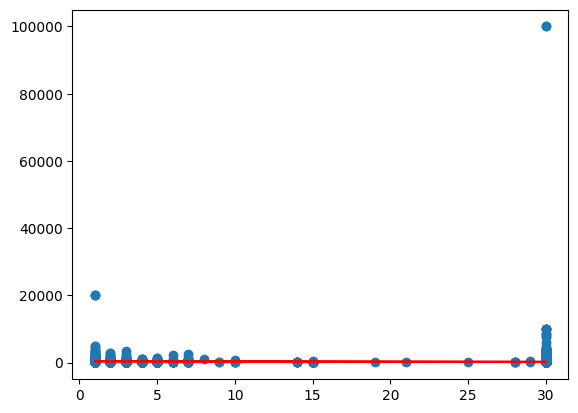

In [ ]:
# create a lin regression model to show the correlation between price and minimum nights

from sklearn.linear_model import LinearRegression

X = price_nights_notna["minimum_nights"].values.reshape(-1, 1)
y = price_nights_notna["price"].values

model = LinearRegression()

model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')

### Kombination Stadtteil, room type und Price

<Axes: xlabel='room_type'>

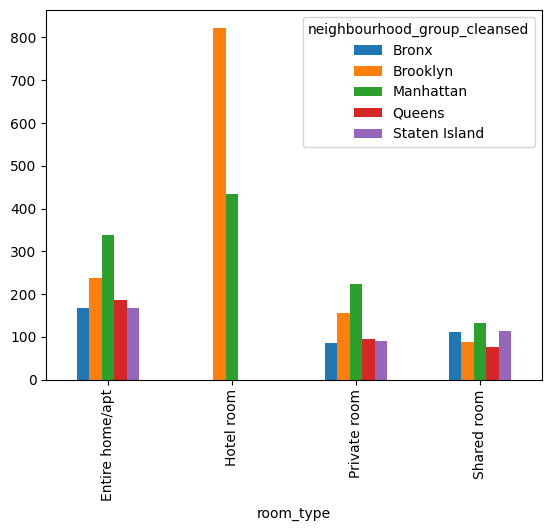

In [ ]:
df.groupby(["room_type", "neighbourhood_group_cleansed"])[
    "price"].mean().unstack().plot.bar()

In [ ]:
# create 